(sec:WhyMCMC)=
# Why MCMC?

## General problems in Bayesian inference

We have been emphasizing that in the Bayesian approach, (almost) everything is a PDF.
Given a PDF, we might be interested in:

1. The exploration of the PDF; 
   - Where is the probability most concentrated and where is there low probability?
   - Are there correlations between parameters?
   - Are there multiple modes (local maxima in the PDF)?
   - What do the *marginal* PDFs look like? (I.e., we have a situation where we want to integrate (marginalize) over a subset of parameters $\thetavec_B$ to find a posterior for the rest $\thetavec_A$. That is, $\thetavec = \{\thetavec_A,\thetavec_B\}$. For example, marginalizing over parameters for the width of a signal and other parameters characterizing our model for the Higgs mass.)
2. The exploration of posterior predictions with a function $g(\pars)$;
   - Finding the **posterior predictive distribution** 
     \begin{equation}
     \{ g(\pars) \; : \; \pars \sim p(\pars) \}
     \end{equation}
     (Recall that this notation means "the distribution of $g(\pars)$ given the distribution of $\pars$".)
   - The evaluation of **expectation values** (as discussed in {ref}`sec:Inference:looking_ahead`)
  
    $$
        \expect{g(\pars)} = \int d\pars\, g(\pars) p(\pars)
      $$ (eq:MCMC:expectation-integral)

The first set of tasks can be addressed with a method to collect a set of samples $\{ \pars_i\}_{i=1}^N$, where the samples are distributed according to $p(\pars)$. The process of generating a random sample according to a probability distribution is commonly called a "draw". Such samples can then be histogrammed and plotted to provide an approximate representation of $p(\pars)$.

In particular, it should be noted that marginal distributions can easily be obtained from these samples by ignoring the values of parameters that we are integrating over. For example, the marginal distribution $p(\para_1,\para_2)$ of $p(\pars)$ with $\pars$ a $D$-dimensional vector is represented by the samples 

$$
\{ (\para_1,\para_2)_i \}_{i=1}^N,
$$

where $(\para_1,\para_2)_i$ are the first two elements of the $\pars_i$ sample. This procedure of ignoring the other parameter values can be understood since the process of marginalization is basically a projection of the multi-dimensional PDF onto the chosen axes. 

The computation of multi-dimensional integrals such as in Eq. {eq}`eq:MCMC:expectation-integral` is very challenging in high dimensions, but high-dimensional integrals appear frequently in science and applied mathematics. They are only analytically solvable in some special cases and it is therefore an important and general problem to be able to solve. It turns out that the ability to draw samples from $p(\pars)$ will make it possible to compute very efficient, numerical approximations of such integrals also in very high dimensions.

## Numerical integration

There are several methods to perform numerical integration. Quadrature is the method of choice for small numbers of dimensions, while Monte Carlo integration becomes very powerful in high dimensions.

### Quadrature methods

For small dimensions, classical numerical integration using quadrature is often the method of choice. For example, the one-dimensional integral

\begin{equation}
I = \int d\para\, f(\para),
\end{equation}

is approximated by a weighted average of the function $f$ evaluated at a number of quadrature points $\{ \para_i \}_{i=1}^N$

\begin{equation}
I \approx \sum_{i=1}^N w_i f(\para_i),
\end{equation}

where the different quadrature schemes are distinguished by using different sets of design points and weights. Familiar examples of such schemes are the trapezoid rule, Simpson's rule, and Gaussian quadrature (the former two rely on evenly space quadrature points while the latter exploits the freedom to choose the spacing).

We note, however, that the number of design points that is required for a fixed precision grows exponentially with dimension. Assuming an integration scheme with $N$ design points in one dimension, the same coverage in $D$ dimensions requires $N^D$ design points, which will be impractically large unless $D$ is sufficiently small. This exponential increase in the number of required function evaluations with the dimensionality of the problem is often called the "curse of dimensionality" and is the main motivation for Monte Carlo integration.

### Monte Carlo integration

The most straightforward implementation of Monte Carlo integration provides an estimate of the $D$-dimensional integral

$$
I = \int_{V_D} d\pars f(\pars) \approx I_N \equiv \frac{V_D}{N} \sum_{i=1}^N f(\pars_i),
$$ (eq:MCMC:MC-integration)

where $\{ \pars_i \}_{i=1}^N$ are $N$ uniformly distributed points in the $D$ dimensional volume $V_D$ of the parameter space. (By "uniformly distributed" here we don't mean equally spaced, but distributed randomly according to a uniform distribution.) The convergence of this expression will not be proven here, but is a consequence of the law of large numbers. Furthermore, one can show that the error in this approximation (usually) decreases as $1/\sqrt{N}$ regardless of the dimensionality $D$, which is the main reason for its usefulness when facing complicated, high-dimensional integrals. To be specific, the variance of $I_N$ can be estimated by the sample variance 

\begin{equation}
\sigma_N^2 = \frac{1}{N-1} \sum_{i=1}^N \left( f(\pars_i) - \langle f \rangle \right)^2,
\end{equation}

where $\langle f \rangle$ is the sample mean, and becomes

\begin{equation}
\text{Var}(I_N)) = V_D^2 \frac{\sigma_N^2}{N}.
\end{equation}


```{caution} $\thetavec_i$ is the $i^{\text{th}}$ set of $\thetavec$ values, not a component of $\thetavec$.
```

:::{admonition} Intuition: naive MC in one dimension
In one dimension, the average of a function

$$
  \overline g(\theta) = \frac{1}{b-a}\int_a^b g(\theta)\,d\theta
$$

from calculus. But we can *estimate* $\overline g(\theta)$ by averaging over a set $n$ of random samples $\{\theta_i\}$:

$$
   \overline g(\theta) \approx \frac{1}{n}\sum_{i=1}^{n} g(\theta_i) .
$$

Then the expectation value of $f(\theta)$ is

$$
  \langle f(\theta) \rangle = \int_a^b g(\theta)\,d\theta
    \approx \frac{b-a}{n}\sum_{i=1}^{n} g(\theta_i)
$$

Here $b-a$ is the "volume" $V_D$ in $D=1$ dimension.

Does this always work? No! (Cf., the radioactive lighthouse problem.) But if the central limit theorem applies, it should work, but usually not efficiently.
:::


```{prf:example} Monte Carlo estimation of $\pi$
A standard example of Monte Carlo integration is the estimation of $\pi$ using the (circular) step function

\begin{equation}
f(x,y) = \left\{ 
\begin{array}{ll}
1 & \text{if $x^2+y^2 \leq 1$} \\
0 & \text{otherwise},
\end{array}
\right.
\end{equation}

such that the integral

\begin{equation}
I = \int_{-1}^1 dx \int_{-1}^1 dy\, f(x,y) = \pi.
\end{equation}


One can estimate $I$ using $N$ samples $\{ (x_i,y_i) \}_{i=1}^N $ from the bivariate, uniform distribution $\mathcal{U} \left( [-1,1]^2 \right)$ such that

$$
I \approx I_N = \frac{4}{N} \sum_{i=1}^N f(x_i,y_i),
$$ (eq:MCMC:MC-integration-pi)

according to Eq. {eq}`eq:MCMC:MC-integration`. In the code cell below we implement this Monte Carlo integration using Python and show that the (relative) error of this numerical simulation of $\pi$ indeed decreases as $1/\sqrt{N}$.
```

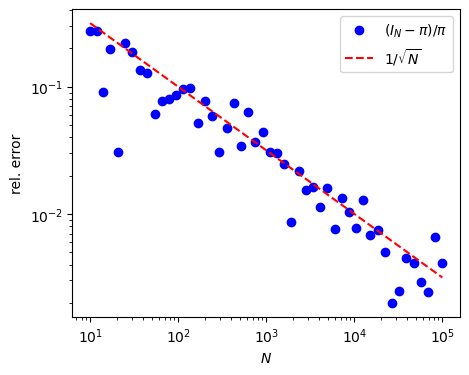

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

num_samples=[int(10**i) for i in np.linspace(1,5,50)]
I_num = []
I_rel_error = []
for num in num_samples:
    max_I_num = 0.
    # We will do ten simulations and find the largest error that is made
    for iexp in range(10):
        # `num` bivariate samples from a uniform distribution [-1,1]**2
        samples = stats.uniform.rvs(loc=-1,scale=2,size=(2,num))
        # Boolean array with elements that are true if the sample is inside the unit circle
        # This corresponds to the unit circle step function
        inside = samples[0,:]**2 + samples[1,:]**2 <= 1
        # We can evaluate the Monte Carlo sum
        iexp_I_num = 4.0 * np.sum(inside) / num
        # We keep the largest error that we find in all experiments
        max_I_num = max(max_I_num,iexp_I_num)
        
    I_num.append(max_I_num)
    # And the (absolute value) of the relative error
    I_rel_error.append(np.abs(I_num[-1]-np.pi)/np.pi)
    
num_samples = np.array(num_samples)
I_rel_error = np.array(I_rel_error)

fig, ax = plt.subplots(nrows=1, ncols=1, **{"figsize":(5,4)})
ax.loglog(num_samples, I_rel_error, 'bo',label=r'$(I_N-\pi) / \pi$')
ax.loglog(num_samples, 1/np.sqrt(num_samples),'r--',label=r'$1/\sqrt{N}$')
ax.set_xlabel(r'$N$')
ax.set_ylabel('rel. error')
ax.legend(loc='best');

from myst_nb import glue
glue("MC-integration_fig", fig, display=False)

```{glue:figure} MC-integration_fig
:name: "fig-MC-integration"

Relative error of the Monte Carlo integration {eq}`eq:MCMC:MC-integration-pi` as a function of the number of samples, demonstrating the $1/\sqrt{N}$ scaling.
```

Despite the favorable $1/\sqrt{N}$-scaling, the problem of straight-forward Monte Carlo integration is that you will often evaluate the integrand at locations where it is small. This affects the precision of the approximation due to the volume factor and because the sample variance is large. It would be more beneficial to focus the sampling to regions that contribute significantly to the integral. 



### Monte Carlo integration in statistics

Indeed, it turns out that significantly better precision can be achieved for integrals such as {eq}`eq:MCMC:expectation-integral`, that appear in statistical computations. Given that we have a method to collect samples $\{ \pars_i \}_{i=1}^N$ from $p(\pars)$, we find that

$$
I = \int_{V_D} d\pars\, g(\pars) p(\pars) \approx I_N \equiv \frac{1}{N} \sum_{i=1}^N g(\pars_i),
$$ (eq:MCMC:MC-pdf-integration)

where you should note that the volume factor has disappeared and that you only evaluate $g(\pars)$ at the sampled positions where the PDF $p(\pars)$ is usually large.

## Sampling from a PDF

We have seen that the ability to draw samples from a probability distribution is very useful. If $p(\pars)$ is of a standard form then it is straightforward to sample from it using available algorithms, most of which are based on nonlinear transformations of uniformly distributed random numbers. For example, a set of samples $\{ u_i\}_{i=1}^N$ from the one-dimensional standard uniform distribution $\mathcal{U}([0,1])$ 
can be tuned to a a set of samples $\{ \para_i \}_{i=1}^N$ from the standard Gaussian distribution $\mathcal{N}(0,1)$ via the transformation

\begin{equation}
\para_i = F^{-1}_{\mathcal{N}}(u_i),
\end{equation}

where $F^{-1}_{\mathcal{N}}$ is the *inverse* distribution function of the standard normal distribution. That is, we interpret $u_i$ as a probability sample and use the above transformation to find the solution to $u_i = F(\para_i)$.

This works well for many standard distributions. However, for the generation of random samples from nonstandard, arbitrary distributions (such as the ones that we might encounter in a realistic Bayesian analysis), no algorithms are available. This is where custom-built Markov chains enter.




## Markov Chain Monte Carlo (MCMC)

The key problem with the naive MC integration approach is that too much time is wasted sampling regions where $p(\thetavec|D,I)$ is very small.
If, for one parameter, the fraction of significant strength is $10^{-1}$, in an $M$-parameter problem the fraction of the volume is $10^{-M}$, which gets very small rapidly with increasing $M$.
This necessitates *importance sampling*, which reweighs the integrand to more appropriately distribution points. This is accomplished by the adaptive Monte Carlo integration program `VEGAS`, but it is difficult to accomplish in general.

The bottom line is that it is not feasible to draw a series of independent random samples from $p(\thetavec|D,I)$ for larger sizes of $\thetavec$.
Remember, independent means if $\thetavec_1, \thetavec_2, \ldots$ is the series, knowing $\thetavec_i$ doesn't tell us anything about $\thetavec_{i+1}$ (or any other $\thetavec$).
*But consecutive samples don't need to be independent.* We just need to generate $p(\thetavec|D,I)$ in the correct proportions; e.g., so it approximates $p(\thetavec|D,I)$ when the samples are histogrammed.

**Solution:** Do a *random walk* (diffusion) in the parameter space of $\thetavec$, so that the probability for being in a region is proportional to $p(\thetavec|D,I)$ for that region.
The basic plan is:
* $\thetavec_{i+1}$ follows from $\thetavec_i$ by a transition probability ("kernel") $\Lra$ $p(\thetavec_{i+1}|\thetavec_i)$.
* The transition probability is assumed to be "time independent", so the same $p(\thetavec_{i+1}|\thetavec_i)$ holds no matter when you do it  $\Lra$ this is a *Markov chain* and the method is called Markov Chain Monte Carlo or MCMC.
* Once we have a representative set of $N$ vectors $\{\thetavec_i\}$, then any expectation value of a function $f$ of $\thetavec$, which is the integral of $f(\thetavec) p(\thetavec|D,I)$ over $\thetavec$, is given simply by the average $\langle f\rangle = \frac{1}{N}\sum_i f(\thetavec_i)$.

We can think of the sampled distribution as a sum of delta functions, whose normalization is trivial:

$$ 
  p(\thetavec|D,I) \rightarrow \frac{1}{N}\sum_{i=1}^{N}\delta(\thetavec-\thetavec_i)
$$

::::{admonition} Checkpoint exercise 
:class: my-checkpoint
Check that with the delta functions we reproduce normalization of $p$ and the rule for $\langle f\rangle$.
:::{admonition} Answer
:class: dropdown, my-answer
$$ 
  \int\!d\thetavec\, p(\thetavec|D,I) \rightarrow 
  \frac{1}{N}\sum_{i=1}^{N} \int\!d\thetavec\, \delta(\thetavec-\thetavec_i)
  =\frac{1}{N}\sum_{i=1}^{N} 1 = 1 ,
$$

$$
 \langle f\rangle = \int\!d\thetavec\, f(\thetavec) p(\thetavec|D,I) \rightarrow 
  \frac{1}{N}\sum_{i=1}^{N} \int\!d\thetavec\, f(\thetavec)\delta(\thetavec-\thetavec_i)
  =\frac{1}{N}\sum_{i=1}^{N} f(\thetavec_i) .
$$

:::
::::

:::{admonition} Intuition for integration

Here we compare two classes of integration methods:
    1. Approximation by Riemann sum (or trapezoid rule).
    1. Approximation using MCMC samples.

Suppose we want to calculate the expectation value of a function $f(x)$ where the distribution of $x$ is $p(x|D,I)$ and we will restrict the domain of $x$ to the positive real axis. So

$$
   \langle f\rangle = \int_{0}^\infty f(x) p(x|D,I) dx
$$ (f_expectation)

and we'll imagine $p(x|D,I)$ is like the red lines in the figures here.

````{image} ./figs/schematic_histogram.png 
:alt: schematic histogram
:class: bg-primary
:width: 300px
````
````{image} ./figs/pdf_histogram_sampled.png
:alt: sampled histogram
:class: bg-primary
:width: 300px
````

In method 1, we divide the $x$ axis into bins of width $\delta x$, let $x_i = i\cdot\Delta x$, $i=0,\ldots,N-1$. Then

$$
  \langle f\rangle \approx \sum_{i=0}^{N-1} f(x_i)\, p(x_i|D,I) \,\Delta x .
$$

The histogram bar height tells us the strength of $p(x_i|D,I)$ and we have a similar discretization for $f(x)$.

In method 2, we *sample* $p(x|D,I)$ to obtain a representative set of $x$ values, which we'll denote by $\{x_j\}$, $j=0,\ldots,N'-1$. If I histogram $\{x_j\}$ it looks like the posterior, as seen in the figures. To approximate the expectation value, we simply use:

$$
  \langle f\rangle \approx \frac{1}{N'}\sum_{j=0}^{N'-1} f(x_j) .
$$

In method 1, the function $p(x | D,I)$ weights $f(x)$ at $x_i$ by multiplying by the value of $p(x_i|D,I$), so strong weighting near the peak of $p$ and weak weighting far away. The amount of the weighting is given (approximately) by the height of the corresponding histogram bar. 
In method 2, we have similar weighting of $f(x)$ near to and far from the peak of $p$, but instead of this being accomplished by multiplying by $p(x_j|D,I)$, there are more $x_j$ values near the peak than far away, in proportion to $p(x_j|D,I)$. In the end it is the same weight!
:::

:::{admonition} Intuition for marginalization of a nuisance parameter
Return to the expectation value of $x$ in Eq. {eq}`f_expectation`, but now suppose we introduce a nuisance parameter $y$ into the distribution,

$$
  p(x|D,I) = \int_{0}^{\infty} dy\, p(x,y|D,I),
$$ (y_marg)

and now we sample $p(x,y|D,I)$ using MCMC to obtain samples $\{(x_j,y_j)\}$, $j=0,\ldots,N'-1$.

If we had a function of $x$ and $y$, say $g(x,y)$, that we wanted to take the expectation value of, we could use our samples as usual:

$$
  \langle g \rangle \approx \frac{1}{N'}\sum_{j=0}^{N'-1} g(x_j,y_j) .
$$ (g_exp_samp)

But suppose we just have $f(x)$, so we want to integrate out the $y$ dependence; e.g., going backwards in {eq}`y_marg`? How do we do that with our samples $\{(x_j,y_j)\}$?

$$\begin{align}
  \langle f \rangle &= \int_{0}^\infty dx f(x)\int_{0}^{\infty} dy\, p(x,y|D,I) \\
  &\approx \frac{1}{N'}\sum_{j=0}^{N'-1} f(x_j) .
\end{align}$$ (f_exp_samp)

Equivalently we can note that $f(x)$ is just a special case of $g(x,y)$ with no $y$ dependence. Then {eq}`g_exp_samp` gives the same formula for $\langle f\rangle$ as {eq}`f_exp_samp`.

So to marginalize, we just use the $x$ values in each $(x_j,y_j)$ pair. **I.e., we ignore the $y_j$ column!**

:::